<a href="https://colab.research.google.com/github/SiriBatchu/Dimensionality_Reduction/blob/main/Dimensionality_Reduction_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install and Import Libraries

In [1]:
!pip install umap-learn tensorflow matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.7 MB/s eta 0:00:00


In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA, FactorAnalysis
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS
import umap.umap_ as umap
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Reshape
from tensorflow.keras.datasets import mnist, cifar10

# Interactive visualization
import plotly.express as px

# Set visualization aesthetics
import seaborn as sns
sns.set(style="whitegrid")

# Load the Datasets

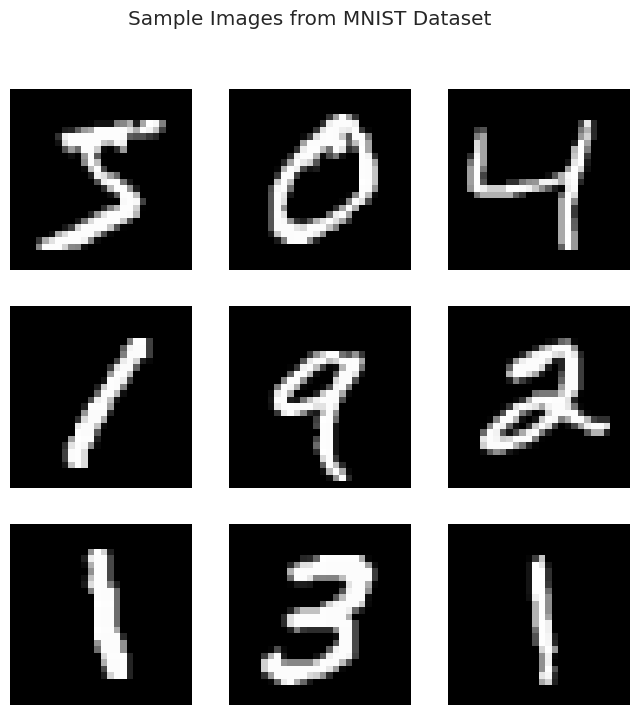

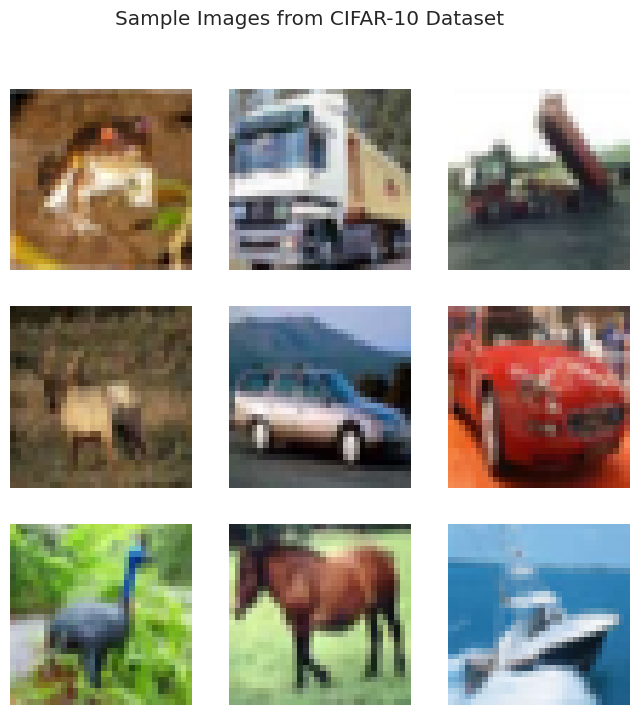

In [ ]:
# Load Datasets
# MNIST
(X_mnist, y_mnist), _ = mnist.load_data()
X_mnist = X_mnist / 255.0  # Normalize
X_mnist_flattened = X_mnist.reshape(X_mnist.shape[0], -1)

# CIFAR-10
(X_cifar, y_cifar), _ = cifar10.load_data()
X_cifar = X_cifar / 255.0  # Normalize
X_cifar_flattened = X_cifar.reshape(X_cifar.shape[0], -1)

# Display samples
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_mnist[i], cmap="gray")
    plt.axis("off")
plt.suptitle("Sample Images from MNIST Dataset")
plt.show()

# Display samples
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_cifar[i], cmap="gray")
    plt.axis("off")
plt.suptitle("Sample Images from CIFAR-10 Dataset")
plt.show()

# 1. Locally Linear Embedding (LLE)


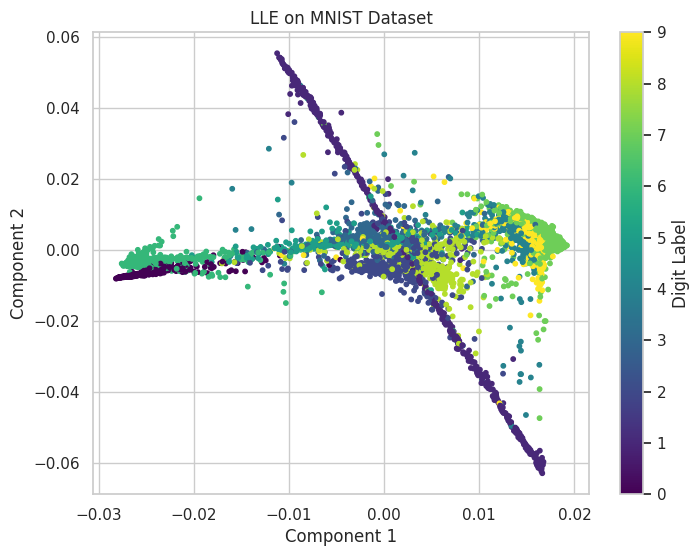

In [ ]:
# LLE on MNIST
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
mnist_lle = lle.fit_transform(X_mnist_flattened[:5000])  # Subset for speed

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(mnist_lle[:, 0], mnist_lle[:, 1], c=y_mnist[:5000], cmap='viridis', s=10)
plt.colorbar(label="Digit Label")
plt.title("LLE on MNIST Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


# 2. t-SNE (t-Distributed Stochastic Neighbor Embedding)


In [ ]:
# t-SNE on CIFAR-10
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
cifar_tsne = tsne.fit_transform(X_cifar_flattened[:5000])

# Interactive visualization
fig = px.scatter(
    x=cifar_tsne[:, 0],
    y=cifar_tsne[:, 1],
    color=y_cifar[:5000].ravel().astype(str),
    labels={'x': 'Component 1', 'y': 'Component 2', 'color': 'Class'},
    title="t-SNE on CIFAR-10 Dataset"
)
fig.show()


# 3. ISOMAP


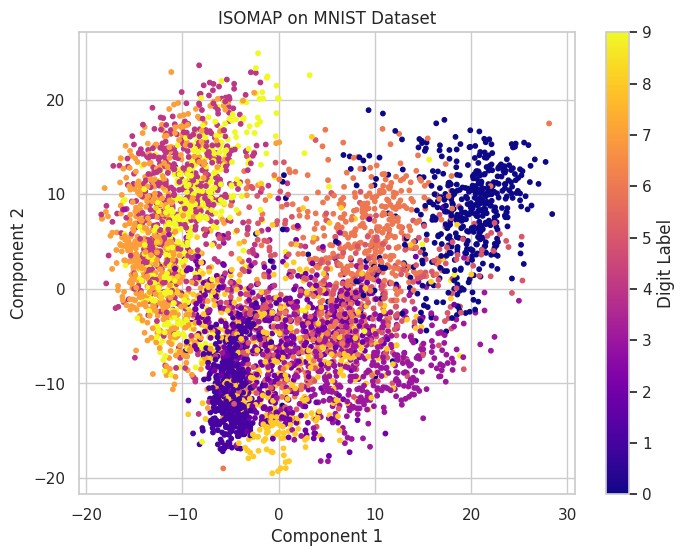

In [ ]:
# ISOMAP on MNIST
isomap = Isomap(n_components=2, n_neighbors=10)
mnist_isomap = isomap.fit_transform(X_mnist_flattened[:5000])

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(mnist_isomap[:, 0], mnist_isomap[:, 1], c=y_mnist[:5000], cmap='plasma', s=10)
plt.colorbar(label="Digit Label")
plt.title("ISOMAP on MNIST Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


# 4. UMAP (Uniform Manifold Approximation and Projection)


In [ ]:
# UMAP on CIFAR-10
umap_model = umap.UMAP(n_components=2, random_state=42)
cifar_umap = umap_model.fit_transform(X_cifar_flattened[:5000])

# Interactive visualization
fig = px.scatter(
    x=cifar_umap[:, 0],
    y=cifar_umap[:, 1],
    color=y_cifar[:5000].ravel().astype(str),
    labels={'x': 'Component 1', 'y': 'Component 2', 'color': 'Class'},
    title="UMAP on CIFAR-10 Dataset"
)
fig.show()


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



#  PCA

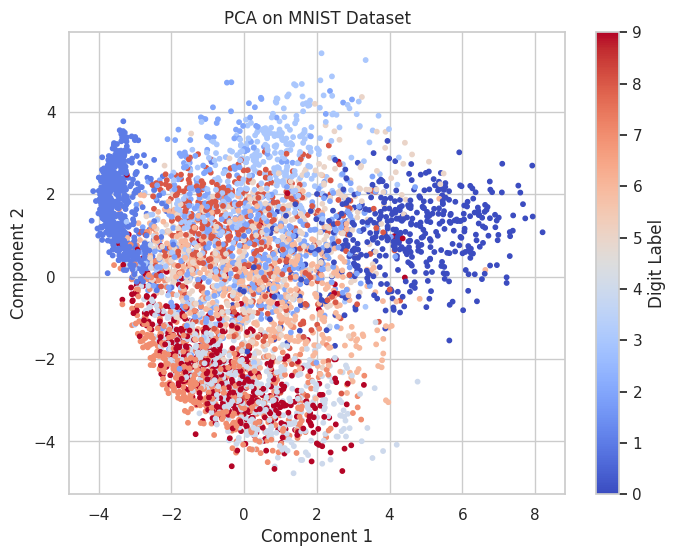

In [ ]:
# PCA on MNIST
pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(X_mnist_flattened[:5000])

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=y_mnist[:5000], cmap='coolwarm', s=10)
plt.colorbar(label="Digit Label")
plt.title("PCA on MNIST Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


# 5. Autoencoders


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


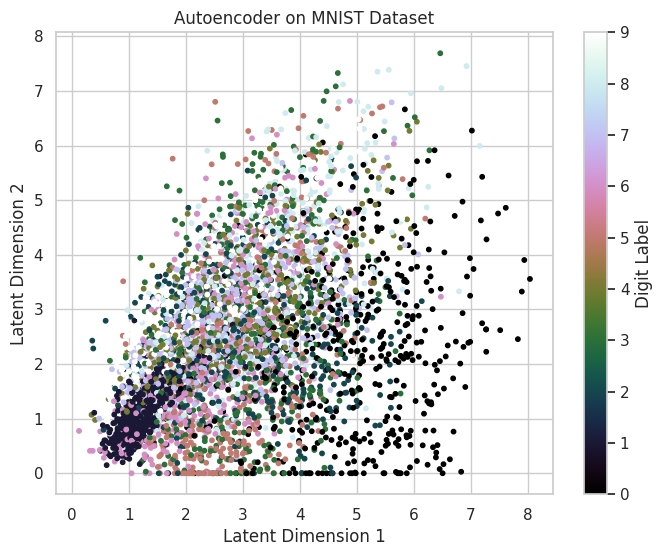

In [ ]:
# Autoencoder for MNIST
input_dim = X_mnist_flattened.shape[1]
encoding_dim = 64

# Build the autoencoder
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
autoencoder.fit(X_mnist_flattened[:5000], X_mnist_flattened[:5000],
                epochs=10, batch_size=256, shuffle=True, verbose=0)

# Transform data
mnist_autoencoded = encoder.predict(X_mnist_flattened[:5000])

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(mnist_autoencoded[:, 0], mnist_autoencoded[:, 1], c=y_mnist[:5000], cmap='cubehelix', s=10)
plt.colorbar(label="Digit Label")
plt.title("Autoencoder on MNIST Dataset")
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.show()


# 6. Multidimensional Scaling (MDS)


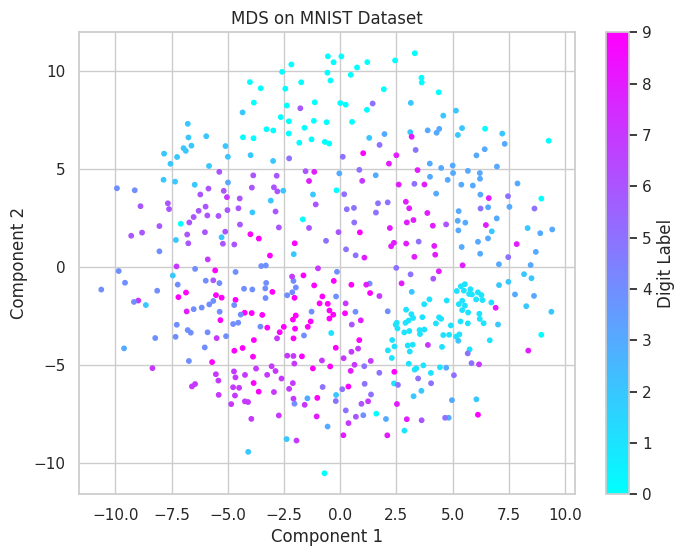

In [ ]:
# MDS on MNIST
mds = MDS(n_components=2, random_state=42)
mnist_mds = mds.fit_transform(X_mnist_flattened[:500])

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(mnist_mds[:, 0], mnist_mds[:, 1], c=y_mnist[:500], cmap='cool', s=10)
plt.colorbar(label="Digit Label")
plt.title("MDS on MNIST Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


# 7. Randomized PCA


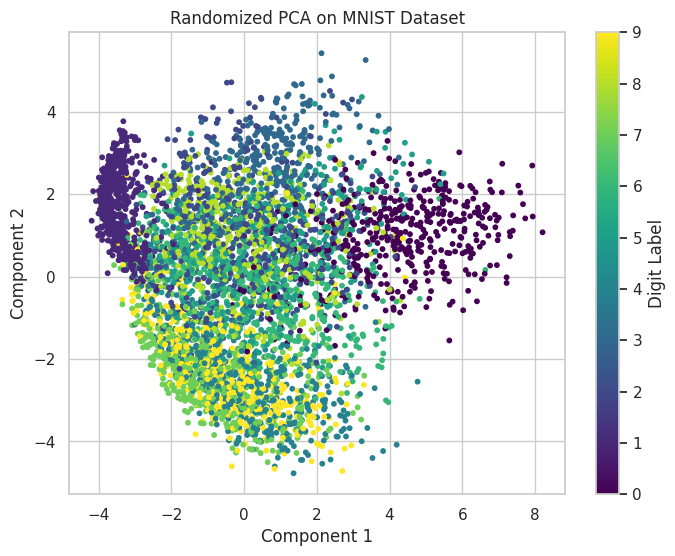

In [ ]:
# Randomized PCA on MNIST
randomized_pca = PCA(n_components=2, svd_solver='randomized', random_state=42)
mnist_randomized_pca = randomized_pca.fit_transform(X_mnist_flattened[:5000])

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(mnist_randomized_pca[:, 0], mnist_randomized_pca[:, 1], c=y_mnist[:5000], cmap='viridis', s=10)
plt.colorbar(label="Digit Label")
plt.title("Randomized PCA on MNIST Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


# 8. Kernel PCA
Kernel PCA extends PCA by applying a kernel function to capture non-linear

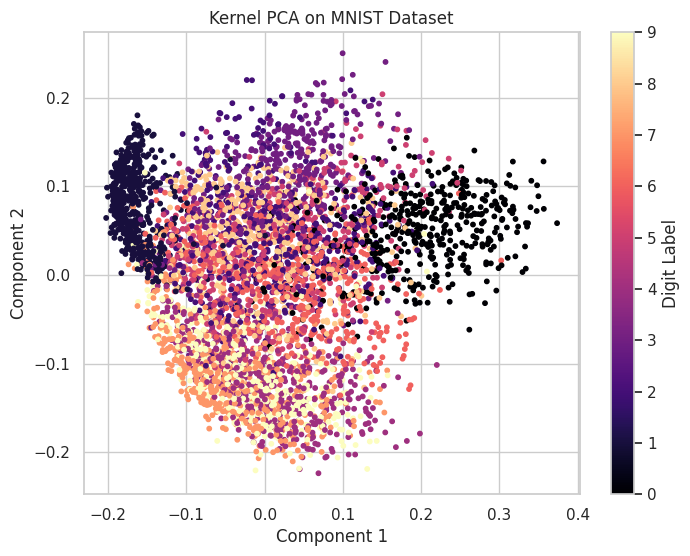

In [ ]:
# Kernel PCA on MNIST
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
mnist_kernel_pca = kernel_pca.fit_transform(X_mnist_flattened[:5000])

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(mnist_kernel_pca[:, 0], mnist_kernel_pca[:, 1], c=y_mnist[:5000], cmap='magma', s=10)
plt.colorbar(label="Digit Label")
plt.title("Kernel PCA on MNIST Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


# 9. Incremental PCA


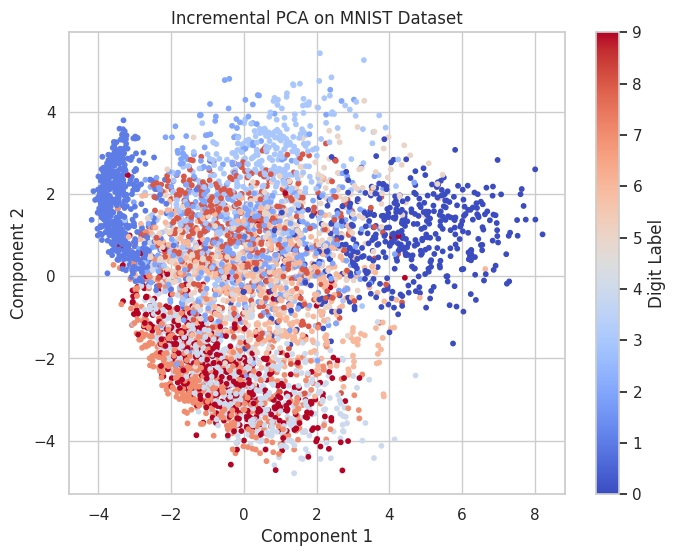

In [ ]:
# Incremental PCA on MNIST
incremental_pca = IncrementalPCA(n_components=2)
mnist_incremental_pca = incremental_pca.fit_transform(X_mnist_flattened[:5000])

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(mnist_incremental_pca[:, 0], mnist_incremental_pca[:, 1], c=y_mnist[:5000], cmap='coolwarm', s=10)
plt.colorbar(label="Digit Label")
plt.title("Incremental PCA on MNIST Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


# 10. Factor Analysis


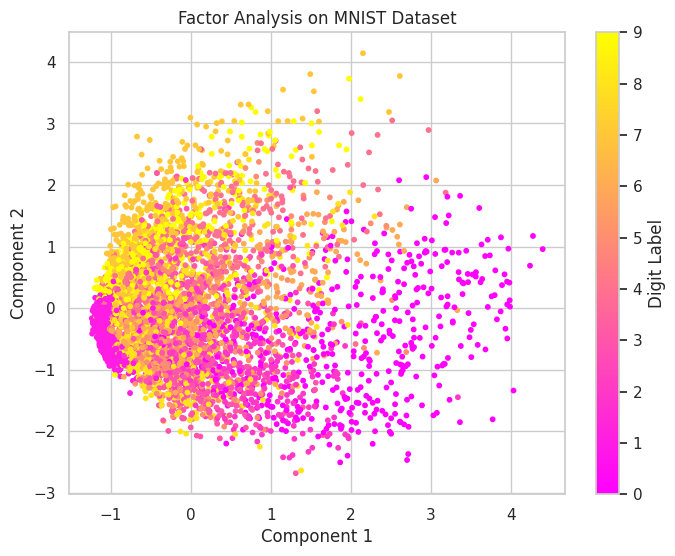

In [ ]:
# Factor Analysis on MNIST
factor_analysis = FactorAnalysis(n_components=2, random_state=42)
mnist_fa = factor_analysis.fit_transform(X_mnist_flattened[:5000])

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(mnist_fa[:, 0], mnist_fa[:, 1], c=y_mnist[:5000], cmap='spring', s=10)
plt.colorbar(label="Digit Label")
plt.title("Factor Analysis on MNIST Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()
